**Previous Deep Neural Network Implementation**

In [19]:
import tensorflow as tf

# load datasets
mnist=tf.keras.datasets.fashion_mnist

# divide into train and test information
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# scale the information
train_images=train_images / 255.0
test_images=test_images / 255.0

# create model
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])
# create model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# fit model
model.fit(train_images, train_labels, epochs=5)

# evaluate the model
test_loss=model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8846
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8740


**Addiing Convolutional Layer in Deep Neural Network Implementation**

In [20]:
import tensorflow as tf

# load datasets
mnist=tf.keras.datasets.fashion_mnist

# divide into train and test information
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# scale the images
train_images=train_images.reshape(60000, 28, 28, 1)
train_images = train_images /255.0
test_images=test_images.reshape(10000, 28, 28, 1)
test_images = test_images /255.0

# create a model
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2, 2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)                                 
                                  ])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# model summary
model.summary()

# fit the model
model.fit(train_images, train_labels, epochs=5)

# test the model
test_loss=model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

**Visualize the Convolutions and Pooling**

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


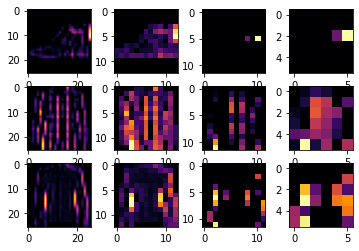

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)